**Financial Data Tools: Tiingo and Pandas Data Reader**

This notebook contains a short demonstration of some of the features of the Tiingo API and the Pandas Data Reader library.

Tiingo documentation:

Tiingo API: https://api.tiingo.com

Tiingo on Pypi.org: https://pypi.org/project/tiingo/#description

Tiingo on readthedocs: https://tiingo-python.readthedocs.io/en/latest/readme.html#usage

Pandas Data Reader documentation:

GitHub: https://github.com/pydata/pandas-datareader

Readthedocs (Tiingo section): https://pandas-datareader.readthedocs.io/en/latest/readers/tiingo.html#module-pandas_datareader.tiingo


First, install tiingo. You can do this from the command line if you prefer.

In [43]:
!pip install tiingo

In [3]:
import numpy as np
import pandas as pd

For some reason, I need to point the code to where tiingo is installed on my machine. YMMV.

In [5]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages")

Import TiingoClient and initialize.

In [11]:
from tiingo import TiingoClient
# Set TIINGO_API_KEY in your environment variables in your .bash_profile, OR
# pass a dictionary with 'api_key' as a key into the TiingoClient.
config = {}
# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

### You will need to get an API key from  https://api.tiingo.com
### The API key is free and includes a max number of requests per hour and day, and data transfer.
### Paid account will give more requests and data transfer.

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "Your API key here"
#Initialize
client = TiingoClient(config)

Now install Pandas Data Reader (here, or from the command line).

In [44]:
!pip install pandas-datareader

In [8]:
import os
import pandas_datareader as pdr

You can pass individual ticker symbols or a list of ticker symbols into the functions. 
Let's get the metadata for Gamestop (ticker symbol GME).

In [41]:
gamestop_metadata = client.get_ticker_metadata("GME")
print(gamestop_metadata)

{'endDate': '2021-03-09', 'exchangeCode': 'NYSE', 'startDate': '2002-02-13', 'ticker': 'GME', 'name': 'Gamestop Corporation - Class A', 'description': "GameStop Corp., a Fortune 500 company headquartered in Grapevine, Texas, is a digital-first omni-channel retailer, offering games and entertainment products in its over 4,800 stores and comprehensive e-Commerce properties across 10 countries. GameStop, through its family of brands offers the best selection of new and pre-owned video gaming consoles, accessories and video game titles, in both physical and digital formats. GameStop also offers fans a wide variety of POP! vinyl figures, collectibles, board games and more. Through GameStop’s unique buy-sell-trade program, gamers can trade in video game consoles, games, and accessories, as well as consumer electronics for cash or in-store credit. The company's consumer product network also includes www.gamestop.com and Game Informer® magazine, the world's leading print and digital video game

In [42]:
##Here is the metadata about Google in a dataframe format (a bit easier to read!):
df_gamestop=pd.DataFrame.from_dict(gamestop_metadata, orient='index') 
df_gamestop

,0
endDate,2021-03-09
exchangeCode,NYSE
startDate,2002-02-13
ticker,GME
name,Gamestop Corporation - Class A
description,"GameStop Corp., a Fortune 500 company headquar..."


Instead of single ticker symbols, you can pass a list of ticker symbols into client.get_ticker_metadata. Note that ticker symbols do not have to be uppercase.

In [17]:
company_symbols = ['EXEL', 'MSFT', 'gme','AMGN', 'DNA']

In [18]:
dict_list=[]
for symbol in company_symbols:
    dict_companies=client.get_ticker_metadata(symbol)
    dict_list.append(dict_companies)
df__company_symbols=pd.DataFrame(dict_list) 
df__company_symbols.head()

,endDate,exchangeCode,startDate,ticker,name,description
0,2021-03-09,NASDAQ,2000-04-17,EXEL,Exelixis Inc,"Founded in 1994, Exelixis, Inc. is a commercia..."
1,2021-03-09,NASDAQ,1986-03-13,MSFT,Microsoft Corporation,"Microsoft (Nasdaq ""MSFT"" @microsoft) enables d..."
2,2021-03-09,NYSE,2002-02-13,GME,Gamestop Corporation - Class A,"GameStop Corp., a Fortune 500 company headquar..."
3,2021-03-09,NASDAQ,1984-09-07,AMGN,AMGEN Inc,Amgen is committed to unlocking the potential ...
4,2010-04-05,NYSE,2001-01-02,DNA,GENENTECH INC,DELISTED - GENENTECH INC


What if we want to get historical price data for our list of stocks? Use pdr.get_data(), pass in the list of symbols, date range and API key. 

The last few days in January 2021 were interesting for Gamestop...

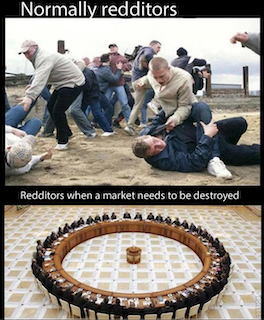

In [31]:
#Pass in the list of ticker symbols, and pandas datareader will download 
#the stock data for the specified time period.
#Need to add error handling for KeyErrors, because some dates are out of range.

test_hist_data_list=[]

for symbol in company_symbols:
    try:
        df_test_prices = pdr.get_data_tiingo(symbol, start='2021-01-25', end='2021-01-29', 
                                           pause=0.2, api_key='Your API Key here') 
        test_hist_data_list.append(df_test_prices)
       
    except KeyError as ke:
        print('KeyError ', ke)


KeyError  'date'


One of our stocks had a very interesting couple of days. Let's take a look.

In [21]:
print(test_hist_data_list[2])

                                   close    high     low    open     volume  \
symbol date                                                                   
gme    2021-01-25 00:00:00+00:00   76.79  159.18   61.13   96.73  177874000   
       2021-01-26 00:00:00+00:00  147.98  150.00   80.20   88.56  161894423   
       2021-01-27 00:00:00+00:00  347.51  380.00  249.00  354.83   90516825   
       2021-01-28 00:00:00+00:00  193.60  483.00  112.25  265.00   58815805   
       2021-01-29 00:00:00+00:00  325.00  413.98  250.00  379.71   49414294   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
gme    2021-01-25 00:00:00+00:00     76.79   159.18   61.13    96.73   
       2021-01-26 00:00:00+00:00    147.98   150.00   80.20    88.56   
       2021-01-27 00:00:00+00:00    347.51   380.00  249.00   354.83   
       2021-01-28 00:00:00+00:00    193.60   483.00  112.25   265.00   
       2021-01

In [32]:
df_test_hist_data=pd.concat(test_hist_data_list, axis=0)
df_test_hist_data

close    high     low      open     volume  \
symbol date                                                                     
EXEL   2021-01-25 00:00:00+00:00   22.82   23.10   22.22   22.2200    2537385   
       2021-01-26 00:00:00+00:00   22.46   23.00   22.19   22.9105    1707981   
       2021-01-27 00:00:00+00:00   22.32   22.65   21.58   22.2000    2309062   
       2021-01-28 00:00:00+00:00   22.30   22.67   21.81   22.3200    2034515   
       2021-01-29 00:00:00+00:00   22.21   22.94   22.10   22.5400    1784852   
MSFT   2021-01-25 00:00:00+00:00  229.53  229.78  224.22  229.1200   33152095   
       2021-01-26 00:00:00+00:00  232.33  234.18  230.08  231.8600   49169601   
       2021-01-27 00:00:00+00:00  232.90  240.44  230.14  238.0000   69870638   
       2021-01-28 00:00:00+00:00  238.93  242.64  235.09  235.6100   49111159   
       2021-01-29 00:00:00+00:00  231.96  238.02  231.35  235.9900   42503138   
gme    2021-01-25 00:00:00+00:00   76.79  159.18   61.13   96.7300  177874000   
       2021-01-26 00:00:00+00:00  147.98  150.00   80.20   88.5600  161894423   
       2021-01-27 00:00:00+00:00  347.51  380.00  249.00  354.8300   90516825   
       2021-01-28 00:00:00+00:00  193.60  483.00  112.25  265.0000   58815805   
       2021-01-29 00:00:00+00:00  325.00  413.98  250.00  379.7100   49414294   
AMGN   2021-01-25 00:00:00+00:00  257.10  257.11  251.85  252.0500    1830711   
       2021-01-26 00:00:00+00:00  258.60  259.07  254.86  256.5900    2009070   
       2021-01-27 00:00:00+00:00  251.06  259.44  250.32  255.4700    3237899   
       2021-01-28 00:00:00+00:00  247.75  276.69  243.45  252.4800    5205633   
       2021-01-29 00:00:00+00:00  241.43  246.47  240.25  244.9300    3792980   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
EXEL   2021-01-25 00:00:00+00:00   22.820000   23.100000   22.220000   
       2021-01-26 00:00:00+00:00   22.460000   23.000000   22.190000   
       2021-01-27 00:00:00+00:00   22.320000   22.650000   21.580000   
       2021-01-28 00:00:00+00:00   22.300000   22.670000   21.810000   
       2021-01-29 00:00:00+00:00   22.210000   22.940000   22.100000   
MSFT   2021-01-25 00:00:00+00:00  229.004846  229.254274  223.706995   
       2021-01-26 00:00:00+00:00  231.798439  233.644207  229.553587   
       2021-01-27 00:00:00+00:00  232.367135  239.889884  229.613450   
       2021-01-28 00:00:00+00:00  238.383339  242.084850  234.552125   
       2021-01-29 00:00:00+00:00  231.429286  237.475421  230.820681   
gme    2021-01-25 00:00:00+00:00   76.790000  159.180000   61.130000   
       2021-01-26 00:00:00+00:00  147.980000  150.000000   80.200000   
       2021-01-27 00:00:00+00:00  347.510000  380.000000  249.000000   
       2021-01-28 00:00:00+00:00  193.600000  483.000000  112.250000   
       2021-01-29 00:00:00+00:00  325.000000  413.980000  250.000000   
AMGN   2021-01-25 00:00:00+00:00  255.189122  255.199047  249.978142   
       2021-01-26 00:00:00+00:00  256.677973  257.144480  252.965770   
       2021-01-27 00:00:00+00:00  249.194014  257.511730  248.459514   
       2021-01-28 00:00:00+00:00  245.908615  274.633520  241.640574   
       2021-01-29 00:00:00+00:00  239.635588  244.638128  238.464358   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
EXEL   2021-01-25 00:00:00+00:00   22.220000    2537385      0.0          1.0  
       2021-01-26 00:00:00+00:00   22.910500    1707981      0.0          1.0  
       2021-01-27 00:00:00+00:00   22.200000    2309062      0.0          1.0  
       2021-01-28 00:00:00+00:00   22.320000    2034515      0.0          1.0  
       2021-01-29 00:00:00+00:00   22.540000    1784852      0.0          1.0  
MSFT   2021-01-25 00:00:00+00:00  228.595784   33152095      0.0          1.0  
       2021-01-26 00:00:00+

What if we want to read news about specific stocks, topics, or just news in general? 

https://tiingo-python.readthedocs.io/en/latest/readme.html#usage

In [40]:
##Use the Tiingo client to get the news. You can pass in tickers, tags, sources, and start
##end dates. See info on the readthedocs website above.
gme_news = client.get_news(tickers=['gme'],
                            #tags=['Laptops'],
                            sources=['washingtonpost.com'],
                            startDate='2021-01-15',
                            endDate='2021-01-29')
df_gme_news=pd.DataFrame(gme_news)
df_gme_news.head(10)

,url,tickers,crawlDate,id,title,tags,source,publishedDate,description
0,https://www.washingtonpost.com/podcasts/post-r...,[gme],2021-01-28T22:31:03.430880Z,32036739,Gaming Wall Street,"[Consumer Cyclical, Daily Podcast, Martine Pow...",washingtonpost.com,2021-01-28T22:15:00Z,"How ordinary investors, spurred on by a Reddit..."
1,https://www.washingtonpost.com/business/2021/0...,[gme],2021-01-28T16:24:42.380662Z,32025702,What you need to know about GameStop’s stock p...,"[Consumer Cyclical, Stock]",washingtonpost.com,2021-01-28T16:13:52.024000Z,"Here’s how ordinary investors, spurred on by a..."
2,https://www.washingtonpost.com/business/2021/0...,[gme],2021-01-28T15:30:05.767987Z,32023831,GameStop shares continue to surge as other sto...,"[Amc, Blackberry, Consumer Cyclical, Gamestop,...",washingtonpost.com,2021-01-28T15:19:12.584000Z,GameStop stock continued to rally in early Thu...
3,https://www.washingtonpost.com/business/2021/0...,[gme],2021-01-27T18:03:43.160440Z,31997707,"GameStop, AMC surge after Reddit users lead ch...","[Amc, Consumer Cyclical, Gamestop, Gme, Retail...",washingtonpost.com,2021-01-27T17:52:10.900000Z,
4,https://www.washingtonpost.com/business/2021/0...,[gme],2021-01-25T18:20:35.935897Z,31939296,"Why GameStop shares are on a wild, Reddit-driv...","[Consumer Cyclical, Gamestop, Gamestop Short S...",washingtonpost.com,2021-01-25T18:12:37.703000Z,Short-sellers and retailer investors have sent...


To get a list of symbols for which Tiingo can access data, and save it to a csv file, use:

In [ ]:
df_symbols=pdr.tiingo.get_tiingo_symbols()
df_symbols.to_csv('tiingo_symbols.csv')